In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

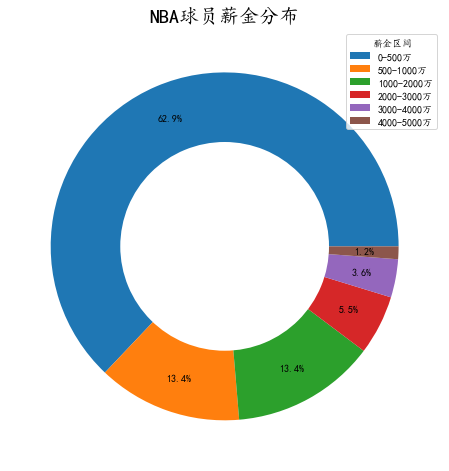

In [83]:
# 统计不同薪金的球员数量占比
data = pd.read_csv('rank_data.csv', encoding='gb2312')
data['薪金区间'] = ''

# 划分薪金区间
for i in range(data.shape[0]):
    if data.loc[i]['本赛季薪金']<500:
        data.loc[i, '薪金区间'] = "0-500万"
    elif data.loc[i]['本赛季薪金']>=500 and data.loc[i]['本赛季薪金']<1000:
        data.loc[i, '薪金区间'] = "500-1000万"
    elif data.loc[i]['本赛季薪金']>=1000 and data.loc[i]['本赛季薪金']<2000:
        data.loc[i, '薪金区间'] = "1000-2000万"
    elif data.loc[i]['本赛季薪金']>=2000 and data.loc[i]['本赛季薪金']<3000:
        data.loc[i, '薪金区间'] = "2000-3000万"
    elif data.loc[i]['本赛季薪金']>=3000 and data.loc[i]['本赛季薪金']<4000:
        data.loc[i, '薪金区间'] = "3000-4000万"
    elif data.loc[i]['本赛季薪金']>=4000 and data.loc[i]['本赛季薪金']<5000:
        data.loc[i, '薪金区间'] = "4000-5000万"

# 统计
grouped = data.groupby('薪金区间')['本赛季薪金'].count().reset_index()
grouped = grouped.reindex(index=grouped.index.insert(1, 5)).drop_duplicates().reset_index().drop('index', axis=1)

# 绘制环形图
section = grouped['薪金区间'].tolist()
num = grouped['本赛季薪金'].tolist()

plt.figure(figsize=(10, 8))
plt.pie(num, pctdistance=0.8, autopct='%.1f%%')

plt.pie([1], radius=0.6, colors='w')
plt.legend(section, fontsize=10,title='薪金区间', loc='best')
plt.title('NBA球员薪金分布', fontsize=20)
plt.show()

<AxesSubplot:title={'center':'球员数据热图'}>

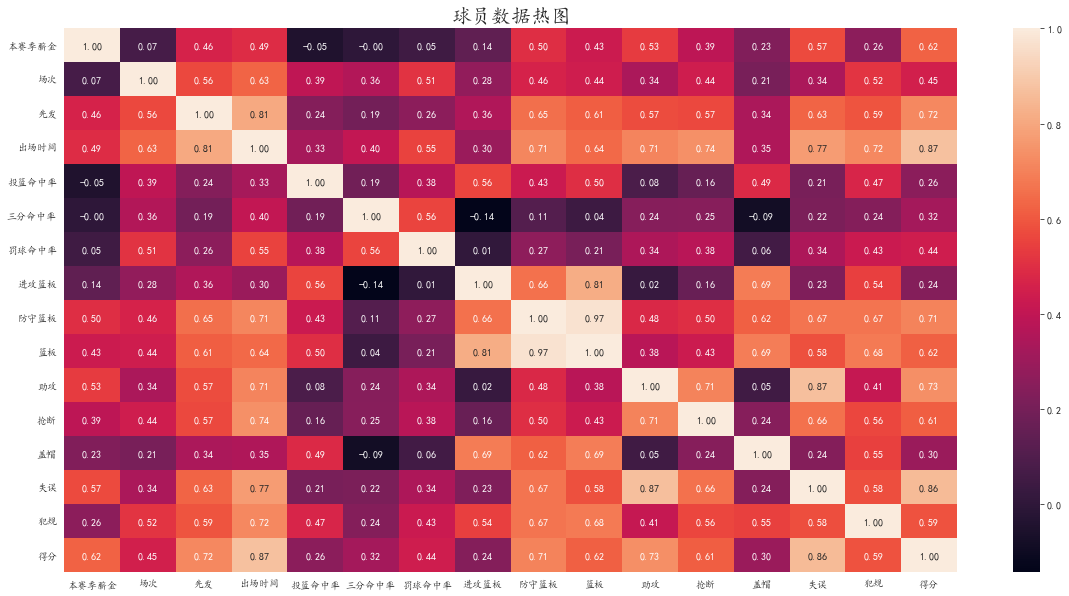

In [10]:
# 球员数据相关性分析
player_df = pd.read_csv('player_dataall.csv')
player_df['球员'] = player_df['球员'].str.lower()
player_df['球员'] = player_df['球员'].str.replace(' ', '_')

# 提取21-22赛季球员表现
player_df = player_df[player_df['赛季']=='2021-22']
player_df = player_df.drop_duplicates(subset='球员', keep='last')
player_df = player_df.drop(['赛季', '所在球队'], axis=1).reset_index().drop('index', axis=1)

# 提取薪金信息
rank_df = pd.read_csv('rank_data.csv', encoding='gb2312')
salary_df = rank_df[['球员', '本赛季薪金']]
salary_df = salary_df[salary_df['本赛季薪金'] != 0]

# 合并
player_df = pd.merge(player_df, salary_df, on='球员')
player_df = player_df.drop('球员', axis=1)
temp = player_df.pop('本赛季薪金')
player_df.insert(0,'本赛季薪金', temp)   

# 计算相关性，绘制热图
plt.figure(figsize=(20, 10))
plt.title('球员数据热图', fontsize=20)
matplotlib.rcParams['axes.unicode_minus']=False
matplotlib.rcParams['font.sans-serif'] = ['KaiTi']
sns.heatmap(player_df.corr(), annot=True, fmt=".2f")

<AxesSubplot:title={'center':'球队数据热图'}>

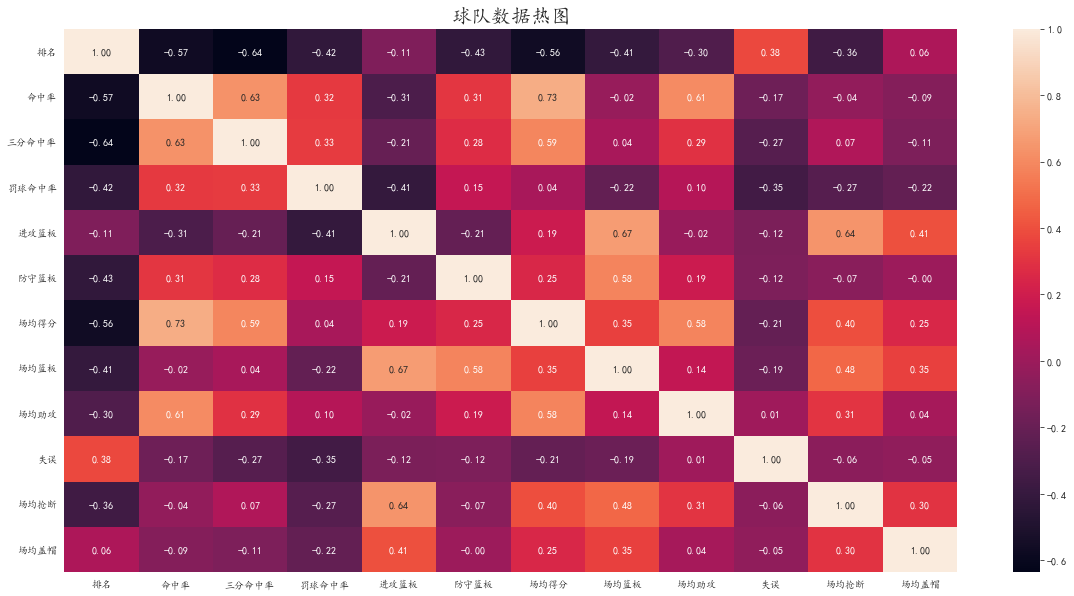

In [9]:
# 球队数据相关性分析
team_df = pd.read_csv('./常规赛/team_2021_2022.csv')
rank_df = pd.read_csv('21_22_team_rank.csv', encoding='gb2312')
rank_df = rank_df[['球队', '排名']]
team_df = pd.merge(team_df, rank_df, on='球队')
team_df = team_df[['排名','命中率','三分命中率','罚球命中率','进攻篮板','防守篮板','场均得分','场均篮板','场均助攻','失误','场均抢断','场均盖帽']]

# 计算相关性，绘制热图
plt.figure(figsize=(20, 10))
plt.title('球队数据热图', fontsize=20)
matplotlib.rcParams['axes.unicode_minus']=False
matplotlib.rcParams['font.sans-serif'] = ['KaiTi']
sns.heatmap(team_df.corr(), annot=True, fmt=".2f")

<AxesSubplot:title={'center':'21-22赛季球员数据分布图'}>

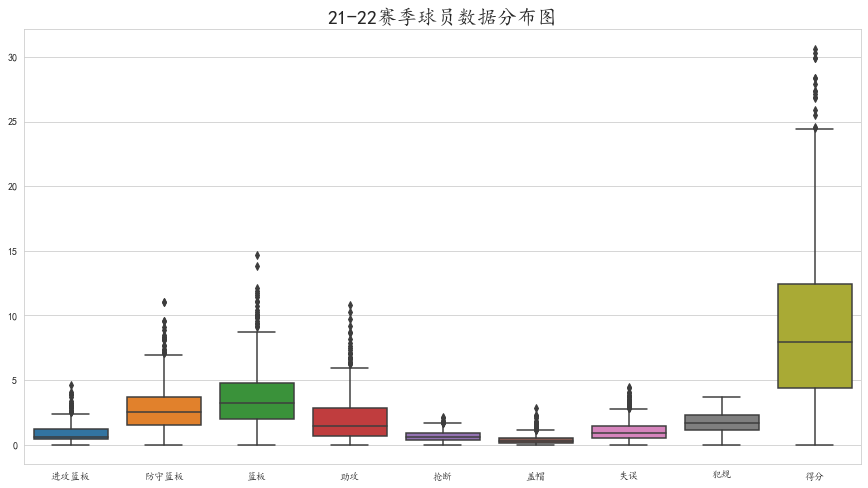

In [8]:
# 球员表现箱线图
player_df = pd.read_csv('player_dataall.csv')
player_df = player_df[player_df['赛季']=='2021-22']
player_df = player_df.drop_duplicates(subset='球员', keep='last')
player_df = player_df.drop(['球员', '赛季', '所在球队', '场次', '先发', '出场时间', '投篮命中率', '三分命中率', '罚球命中率',], axis=1)

# 绘制箱线图
plt.figure(figsize=(15, 8))
plt.title('21-22赛季球员数据分布图', fontsize=20)
sns.set_style("whitegrid")
matplotlib.rcParams['font.sans-serif'] = ['KaiTi']
sns.boxplot(data=player_df[list(player_df.columns)])

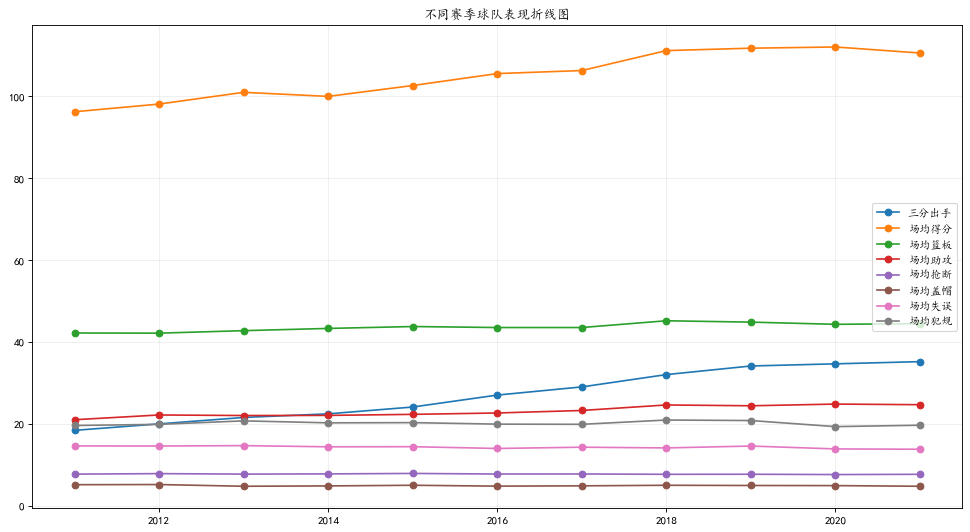

In [64]:
# 球员表现赛季变化折线图

# 提取球队数据存储到字典
season_df = pd.DataFrame(columns=['三分出手','总得分','总篮板','总助攻','总抢断','总盖帽','总失误','总犯规'])
for i in range(2011, 2022):
    df = pd.read_csv('./常规赛/team_'+str(i)+'_'+str(i+1)+'.csv')
    df = df[['场次','命中','出手','三分命中','三分出手','总得分','总篮板','总助攻','总抢断','总盖帽','总失误','总犯规']] 
    df = pd.DataFrame(df.sum())
    df = df.T
    num = df['场次'][0]
    df = df/num
    df['命中率']  = df['命中'] / df['出手']
    df['三分命中率']  = df['三分命中'] / df['三分出手']
    df = df.drop(['场次','命中','出手','三分命中'], axis=1)
    season_df = pd.concat([season_df, df], axis=0)
    try:
        df = df.drop("Unnamed: 0",axis=1)
    except:
        pass
season_df.columns = ['三分出手','场均得分','场均篮板','场均助攻','场均抢断','场均盖帽','场均失误','场均犯规','命中率','三分命中率']

#设置图片大小
plt.figure(figsize=(15, 8), dpi=80)
#画图——折线图
for i in range(8):
    plt.plot(range(2011, 2022), season_df[season_df.columns[i]], label=season_df.columns[i], marker='o')

# #设置网格线
plt.grid(alpha=0.2)
matplotlib.rcParams['font.sans-serif'] = ['KaiTi']
plt.title('不同赛季球队表现折线图')
plt.legend(loc='center right')
plt.show()


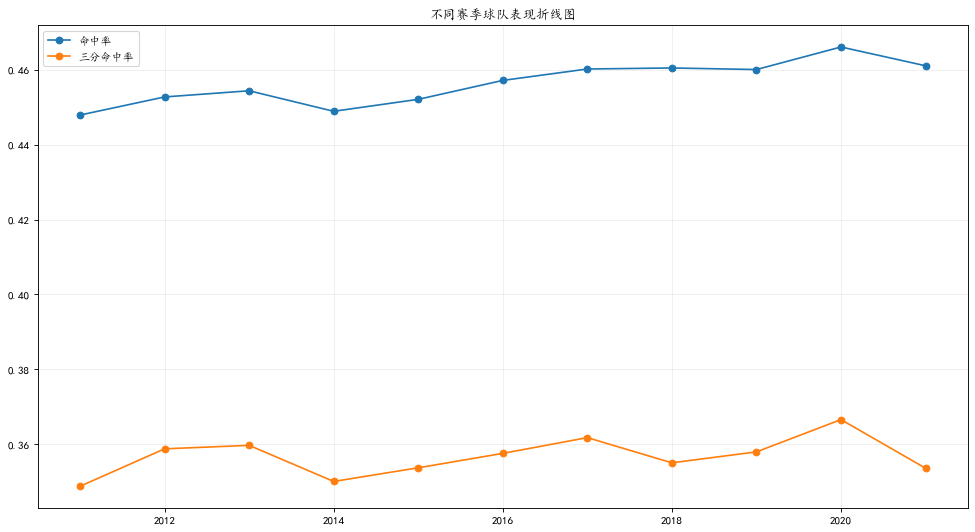

In [56]:
#设置图片大小
plt.figure(figsize=(15, 8), dpi=80)
#画图——折线图
for i in range(8,10):
    plt.plot(range(2011, 2022), season_df[season_df.columns[i]], label=season_df.columns[i], marker='o')

# #设置网格线
plt.grid(alpha=0.2)
matplotlib.rcParams['font.sans-serif'] = ['KaiTi']
plt.title('不同赛季球队表现折线图')
plt.legend()
plt.show()

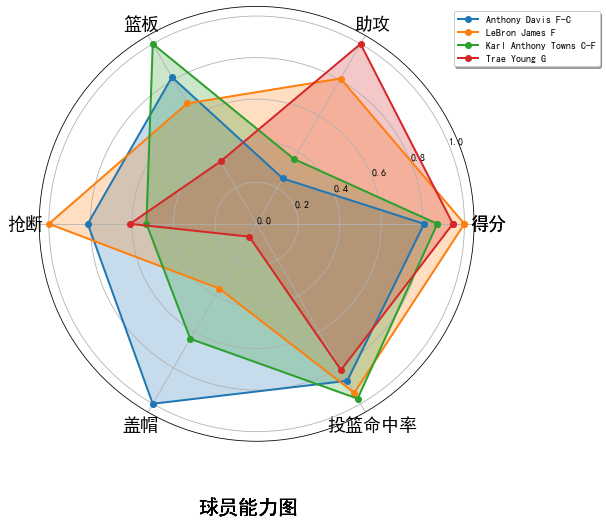

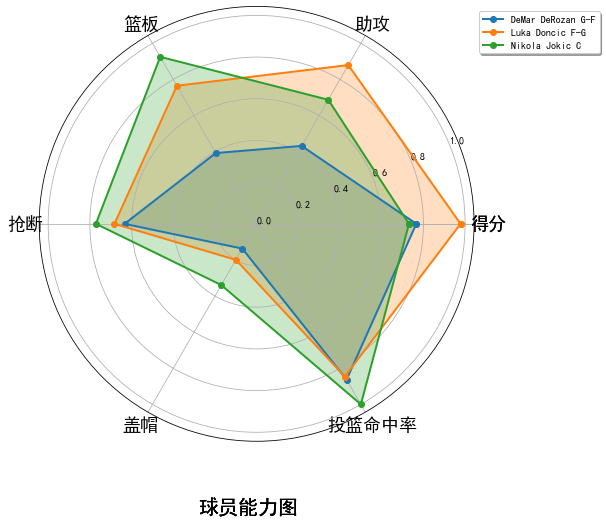

In [92]:
# 各位置最佳球员六边形图
radar_df = pd.read_csv('各位置最佳数据.csv')

name = radar_df['球员']
score = radar_df['得分']
assist = radar_df['助攻']
rebound = radar_df['篮板']
steal = radar_df['抢断']
block = radar_df['盖帽']
shoot = radar_df['投篮命中率']

def sortmax(li):
    liratio=[]                      
    limax=eval(str(li[0]))     
    for i in range(len(name)):
        if eval(str(li[i]))>=limax:
            limax=eval(str(li[i]))
    for i in range(len(name)):
        liratio.append(eval(str(li[i]))/limax)
    return limax,liratio

scoremax,score1=sortmax(score)
assistmax,assist1=sortmax(assist)
reboundmax,rebound1=sortmax(rebound)
stealmax,steal1=sortmax(steal)
blockmax,block1=sortmax(block)
shootmax,shoot1=sortmax(shoot)

radar_labels = np.array(['得分', '助攻', '篮板','抢断','盖帽','投篮命中率']) #雷达标签
nAttr = 6
angles = np.linspace(0, 2*np.pi, nAttr, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
radar_labels=np.concatenate((radar_labels,[radar_labels[0]]))

matplotlib.rcParams['font.family']='SimHei' 
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

# F-C,F,C-F,G
player1 = ['Anthony Davis F-C','LeBron James F','Karl Anthony Towns C-F','Trae Young G']
fig1 = plt.figure(facecolor="white",figsize=(10, 8))
ax1 = fig1.add_subplot(111, polar=True)
for k in [0,3,5,6]:
    data=[[score1[k]],[assist1[k]],[rebound1[k]],[steal1[k]],[block1[k]],[shoot1[k]]]
    data=np.array(data)
    eachdata = np.concatenate((data,[data[0]]))
    
    ax1.plot(angles, eachdata, 'o-', linewidth=2) 
    ax1.fill(angles, eachdata, alpha=0.25) 

    ax1.set_thetagrids(angles*180/np.pi,
                    radar_labels,
                    fontsize = 18)
    ax1.set_rgrids(np.arange(0,1.2,0.2)) 
    plt.figtext(0.5,0,'球员能力图',ha='center',size=20)
    plt.legend(player1, loc='upper right', bbox_to_anchor=(1.3,1.0),ncol=1,fancybox=True,shadow=True)
    plt.grid(True)

# G-F,F-G,C
player2 = ['DeMar DeRozan G-F','Luka Doncic F-G','Nikola Jokic C']
fig2 = plt.figure(facecolor="white",figsize=(10, 8))
ax2 = fig2.add_subplot(111, polar=True)
for k in [1,2,4]:
    data=[[score1[k]],[assist1[k]],[rebound1[k]],[steal1[k]],[block1[k]],[shoot1[k]]]
    data=np.array(data)
    eachdata = np.concatenate((data,[data[0]]))
    
    ax2.plot(angles, eachdata, 'o-', linewidth=2) 
    ax2.fill(angles, eachdata, alpha=0.25) 

    ax2.set_thetagrids(angles*180/np.pi,
                    radar_labels,
                    fontsize = 18)
    ax2.set_rgrids(np.arange(0,1.2,0.2)) 
    plt.figtext(0.5,0,'球员能力图',ha='center',size=20)
    plt.legend(player2, loc='upper right', bbox_to_anchor=(1.3,1.0),ncol=1,fancybox=True,shadow=True)
    plt.grid(True)


In [80]:
# 常规赛与季后赛表现变化
regular_df = pd.read_csv('./常规赛/team_2021_20221.csv')
playoff_df = pd.read_csv('./季后赛/team_2021_2022.csv')

new_df1 = regular_df[regular_df.球队.isin(playoff_df.球队)]
new_df2 = playoff_df[playoff_df.球队.isin(regular_df.球队)]

new_df1.sort_values(by='球队', ascending=False, inplace=True)
regular_df = new_df1.reset_index().drop('index', axis=1)
diff_df = regular_df[['球队','赛区']]
regular_df = regular_df[['命中率','三分命中率','罚球命中率','进攻篮板','防守篮板','场均得分','场均篮板','场均助攻','失误','场均抢断','场均盖帽','犯规']]
regular_ar = regular_df.values


new_df2.sort_values(by='球队', ascending=False, inplace=True)
playoff_df = new_df2.reset_index().drop('index', axis=1)
diff_df = playoff_df[['球队','赛区']]
playoff_df = playoff_df[['命中率','三分命中率','罚球命中率','进攻篮板','防守篮板','场均得分','场均篮板','场均助攻','失误','场均抢断','场均盖帽','犯规']]
playoff_ar = playoff_df.values

temp_df = pd.DataFrame(playoff_ar-regular_ar)
diff_df = pd.concat([diff_df,temp_df], axis=1)
diff_df.columns = ['球队','赛区','命中率','三分命中率','罚球命中率','进攻篮板','防守篮板','场均得分','场均篮板','场均助攻','失误','场均抢断','场均盖帽','犯规']
diff_df

D:\anaconda3\envs\pytorch\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,球队,赛区,命中率,三分命中率,罚球命中率,进攻篮板,防守篮板,场均得分,场均篮板,场均助攻,失误,场均抢断,场均盖帽,犯规
0,鹈鹕,西部,0.5,2.2,-0.9,3.0,-2.7,0.5,0.3,-3.7,0.44,-1.96,-0.50,1.34
1,雄鹿,东部,0.4,1.4,-8.7,-2.0,7.1,-5.7,5.1,-0.5,1.98,-1.20,0.82,-0.42
2,老鹰,东部,-3.0,-4.8,-3.0,-1.4,-3.1,-16.5,-4.6,-6.0,4.55,-1.36,-1.84,2.89
3,篮网,东部,2.8,6.1,-6.7,-1.8,-8.6,-3.9,-10.4,-3.0,1.19,0.90,1.04,4.38
4,猛龙,东部,0.1,-5.0,3.5,-3.4,-4.3,-6.2,-7.6,-1.4,-2.45,-2.33,0.24,2.57
5,独行侠,西部,-1.7,2.1,1.8,-3.3,-2.1,-3.3,-5.3,-4.1,-3.83,-0.23,-1.63,3.51
6,爵士,西部,-2.8,-8.6,1.9,-1.5,-0.1,-14.6,-1.5,-5.2,-2.33,-3.17,-1.23,3.13
7,热火,东部,-0.2,-3.5,-2.5,-1.6,-2.1,-0.6,-3.7,-0.1,-1.36,2.01,-0.23,2.92
8,灰熊,西部,-1.0,-1.1,-1.6,-2.3,-2.2,-0.8,-4.6,0.2,2.20,-1.36,-0.70,3.84
9,森林狼,西部,-1.6,3.0,5.3,-4.0,0.5,-6.1,-3.6,-2.9,4.67,-1.39,2.79,6.22


In [3]:
# Top10柱状图
from pyecharts import options as opts
data = pd.read_csv('./个人生涯平均数据.csv')
defen = data.loc[1:, ['球员','得分']].sort_values(by=['得分'],ascending=False)
lanban = data.loc[1:, ['球员','篮板']].sort_values(by=['篮板'],ascending=False)
zhugong = data.loc[1:, ['球员','助攻']].sort_values(by=['助攻'],ascending=False)
defen = defen.head(10).round(1)
lanban = lanban.head(10).round(1)
zhugong = zhugong.head(10).round(1)
q = defen['球员'].tolist()
w = lanban['球员'].tolist()
e = zhugong['球员'].tolist()

In [4]:
a = defen['得分'].tolist()
b = lanban['篮板'].tolist()
t = zhugong['助攻'].tolist()
tmp = []
for i in range(10):
    tmp.append([a[i],b[i],t[i]])
tmp

[[27.1, 12.5, 9.1],
 [26.5, 11.3, 8.8],
 [25.6, 11.2, 8.0],
 [24.8, 10.8, 7.8],
 [24.1, 10.6, 7.6],
 [23.8, 10.5, 7.4],
 [23.8, 10.4, 7.4],
 [23.6, 10.2, 7.4],
 [23.3, 10.2, 7.3],
 [22.4, 9.6, 7.1]]

In [5]:
from pyecharts.charts import Bar
from pyecharts.globals import ThemeType
from pyecharts.render import make_snapshot
from snapshot_selenium import snapshot
# 2019年各球员各项数据对比
def bar_datazoom_slider() -> Bar:
    c = (
        Bar(init_opts=opts.InitOpts(theme=ThemeType.VINTAGE))
        .add_xaxis(q)
        .add_yaxis('得分',a)
        .set_global_opts(
            xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-20)),
            title_opts=opts.TitleOpts(title='''
            球员生涯得分数据前十'''),
            datazoom_opts=opts.DataZoomOpts(),
        )
    )
    return c

pic = bar_datazoom_slider()
bar_datazoom_slider().render_notebook()

# make_snapshot(snapshot, pic.render(), "得分.png")

In [6]:
from pyecharts.charts import Bar
from pyecharts.globals import ThemeType
# 2019年各球员各项数据对比
def bar_datazoom_slider() -> Bar:
    c = (
        Bar(init_opts=opts.InitOpts(theme=ThemeType.VINTAGE))
        .add_xaxis(w)
        .add_yaxis('篮板',b)
        .set_global_opts(
            xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-20)),
            title_opts=opts.TitleOpts(title='''
            球员生涯篮板数据前十'''),
            datazoom_opts=opts.DataZoomOpts(),
        )
    )
    return c

bar_datazoom_slider().render_notebook()

In [7]:
from pyecharts.charts import Bar
from pyecharts.globals import ThemeType
# 2019年各球员各项数据对比
def bar_datazoom_slider() -> Bar:
    c = (
        Bar(init_opts=opts.InitOpts(theme=ThemeType.VINTAGE))
        .add_xaxis(e)
        .add_yaxis('助攻',t)
        .set_global_opts(
            xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-20)),
            title_opts=opts.TitleOpts(title='''
            球员生涯助攻数据前十'''),
            datazoom_opts=opts.DataZoomOpts(),
        )
    )
    return c

bar_datazoom_slider().render_notebook()